In [ ]:
# Check final model statistics

In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

import load_data
import loops
import exploratory_analysis.analyze_k
from best_model import best_model
SEED = 0

df, train_indices, valid_indices = load_data.load_train_data()


In [2]:
# Model including engineered features
reg = LogisticRegression(solver='liblinear', penalty='l2')
results = loops.loop_model(reg,df,train_indices,valid_indices,oversample=load_data.gen_SMOTE_data,var_thresh=True)
exploratory_analysis.analyze_k.average_outcome(results)


{'accuracy': 0.6057935093229212,
 'f1': 0.6149668029480223,
 'Macro f1': 0.3927558446468965,
 'recall_1': 0.1801010101010101,
 'precision_1': 0.28984126984126984,
 'recall_2': 0.567849846782431,
 'precision_2': 0.26934828134504596,
 'recall_3': 0.15492957746478875,
 'precision_3': 0.29082591123054796,
 'recall_4': 0.7446468620893174,
 'precision_4': 0.8483324879237353}

In [3]:
# Model excluding engineered features
engineered_features = ['max_education_level', 'hh_has_marriage', 'hh_max_age', 
    'hh_sex_ratio', 'hh_child_woman_ratio_12', 'hh_child_adult_ratio_12', 
    'hh_child_woman_ratio_19', 'hh_child_adult_ratio_19', 'v2a1_log']
df_no_ef = df.drop(columns=[col for col in df if col in engineered_features])

reg = LogisticRegression(solver='liblinear', penalty='l2')
results = loops.loop_model(reg,df_no_ef,train_indices,valid_indices,oversample=load_data.gen_SMOTE_data,var_thresh=True)
exploratory_analysis.analyze_k.average_outcome(results)


{'accuracy': 0.5836041083099908,
 'f1': 0.5962867419231248,
 'Macro f1': 0.37667317469003103,
 'recall_1': 0.1713131313131313,
 'precision_1': 0.28181776556776555,
 'recall_2': 0.5316138917262513,
 'precision_2': 0.24896819165236156,
 'recall_3': 0.15492957746478875,
 'precision_3': 0.27049638811036986,
 'recall_4': 0.7200970555446258,
 'precision_4': 0.8357876348892337}

In [4]:
# create new test/train split to check predictions
train, test = train_test_split(df, test_size = .2, random_state = SEED)
log_model, col_names = best_model(train)

# drop the target col and col names that model didn't find useful
X_test = test.drop(columns="Target")
X_test = X_test.drop(columns=[col for col in X_test if col not in col_names])

# predict y based on the model
y_pred = log_model.predict(X_test)

# merge together and make flag if prediction was right
y_pred_df = pd.DataFrame(y_pred)
y_pred_df = y_pred_df.rename(columns={0: 'Target_pred'})
test.reset_index()
df_pred = pd.merge(test, y_pred_df, left_index=True, right_index=True)
df_pred.loc[:, 'acc_pred'] = np.where(df_pred.loc[:, 'Target'] == df_pred.loc[:, 'Target_pred'], 1, 0)


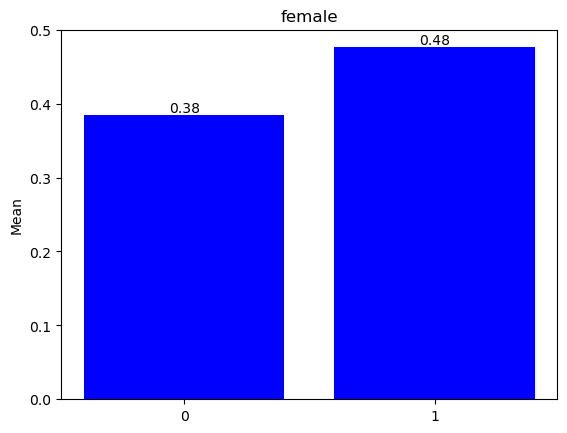

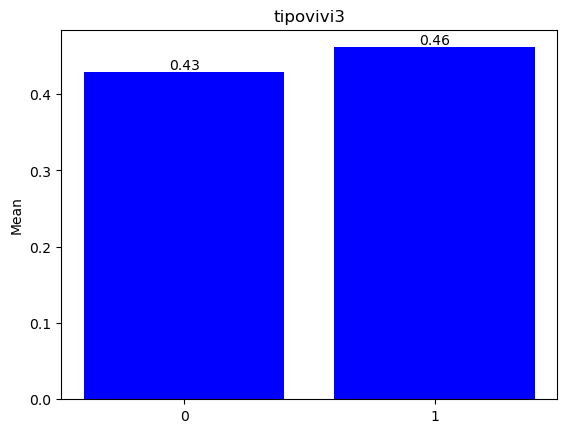

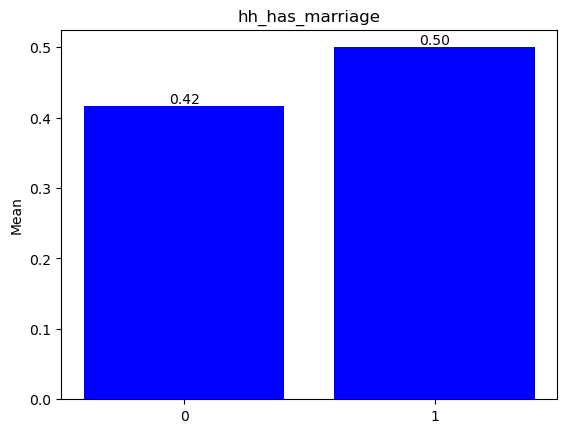

In [9]:
# Make some graphs of accuracy
graph_vars = ['female', 'tipovivi3', 'hh_has_marriage']
sum_var = 'acc_pred'

for graph_var in graph_vars:

    x1 = df_pred.groupby(graph_var).mean().reset_index()

    fig, ax = plt.subplots()    
    
    bars = plt.bar(range(len(x1)), x1[sum_var], color="blue")
    ax.bar_label(bars, fmt='%.2f')
    plt.xticks(range(len(x1)), x1[graph_var])
    plt.ylabel('Mean')
    plt.title(graph_var)

    plt.show()  